# Aprendizaje No Supervisado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from random import randint

In [2]:
data = pd.read_excel("../Datasets/HVAC.xlsx", "HISTORICO_DATOS", index_col=0)

In [3]:
data2 = data
variables_a_eliminar = ["C_O_P_ BOMBA CALOR FELIPE", "C_O_P_ BOMBA CALOR CARLOS",
                        "C_O_P_ INSTALACIÓN GRUPO FRÍO 1", "C_O_P_ INSTALACÍON GRUPO FRÍO 2",
                        "ORDEN", "VÁLVULA BY PASS SECUNDARIO FRÍO",
                        "TEMPERATURA CONTROL DE BY PASS SECUNDARIO", "SECUNDARIO FRÍO 1",
                        "SECUNDARIO FRÍO 2", "SECUNDARIO FRÍO 3", "MODO INVIERNO BC1", 
                        "MODO INVIERNO BC2", "PERIODO P6", "CONTROL CALOR", 
                        "CAPACIDAD BOMBA CALOR FELIPE %", "CAPACIDAD BOMBA CALOR CARLOS %",
                        "CAPACIDAD GRUPO DE FRÍO 1"," CAPACIDAD GRUPO DE FRÍO 2",
                        "IMPULSIÓN SECUNDARIO CALOR", "SECUNDARIO CALOR 1", 
                        "SECUNDARIO CALOR 2", "SECUNDARIO CALOR 3",
                        "Fecha- hora de lectura"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]
data2 = data2[subLista]

In [4]:
data3 = data2
data3["POTENCIA TERMICA BOMBA CALOR CARLOS"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS"] * 0.001163
data3["POTENCIA TERMICA BOMBA CALOR FELIPE"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 1"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 2"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2"] * 0.001163

C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

### Optimal value for epsilon (eps)

In [5]:
def epsilon(data):
    # The optimal value for epsilon will be found at the point of maximum curvature
    neigh = NearestNeighbors(n_neighbors = 2)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.figure(figsize=(15, 8))
    plt.plot(distances)

In [6]:
def metricas(data, labels):
    s = metrics.silhouette_score(data, labels, metric='euclidean')
    print('silhouette_score: ', s)

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: ', n_clusters_)
    print('Estimated number of noise points: ', n_noise_)
    return n_clusters_

In [7]:
def grafica_clusters(data, labels, n_clusters_):
    X = np.array(data)
    colors = []
    for i in range(n_clusters_):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
        colors.append('#D3D3D3')
    vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
    plt.figure(figsize=(15, 8))
    plt.scatter(X[:,0], X[:,1], c = vectorizer(labels), s=1)

## C_O_P Carlos

In [8]:
dataCarlos = data3[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR CARLOS']]
dataCarlos.describe()

,POTENCIA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR CARLOS,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR CARLOS
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,33.616413,132.154739,15.083257,29.447289
std,43.907480,149.917857,11.345877,13.676912
min,0.000000,0.000000,-1.400000,0.000000
25%,0.480000,9.877769,6.968000,16.940001
50%,0.500000,46.868723,13.353139,34.740002
75%,67.599998,255.914298,23.717333,42.450001
max,164.206665,592.614391,43.799999,47.889999


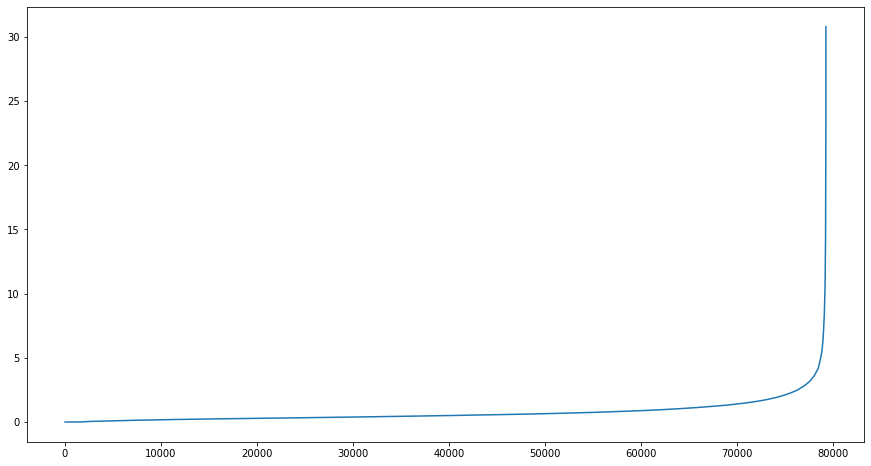

In [9]:
epsilon(dataCarlos)

In [10]:
clustering_carlos = DBSCAN(eps = 3, min_samples = 20)
clustering_carlos.fit(dataCarlos)
labels_carlos = clustering_carlos.labels_ # clusters

### Silhouette Coefficient

A higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

    a: The mean distance between a sample and all other points in the same class.
    b: The mean distance between a sample and all other points in the next nearest cluster.
    s = (b-a) / max(a,b)
    
The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

In [11]:
n_clusters_carlos = metricas(dataCarlos, labels_carlos)

silhouette_score:  -0.30975770125622953
Estimated number of clusters:  50
Estimated number of noise points:  9931


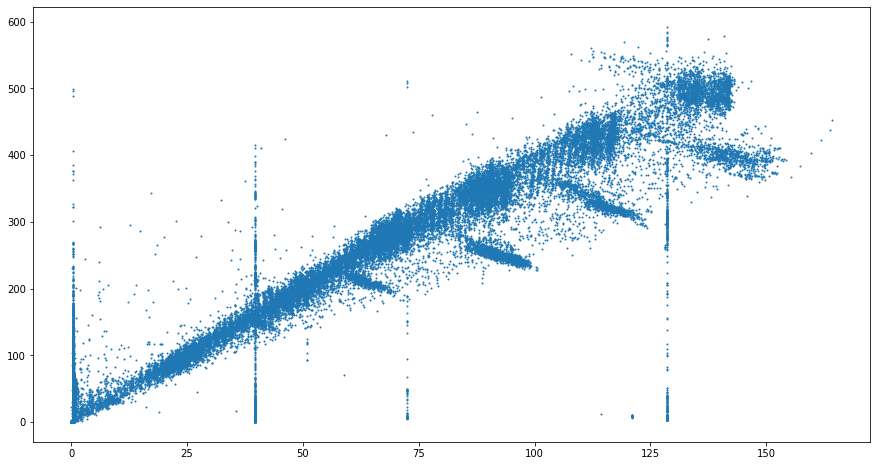

In [12]:
X_carlos = np.array(dataCarlos)
plt.figure(figsize=(15, 8))
plt.scatter(X_carlos[:,0], X_carlos[:,1], s = 1)

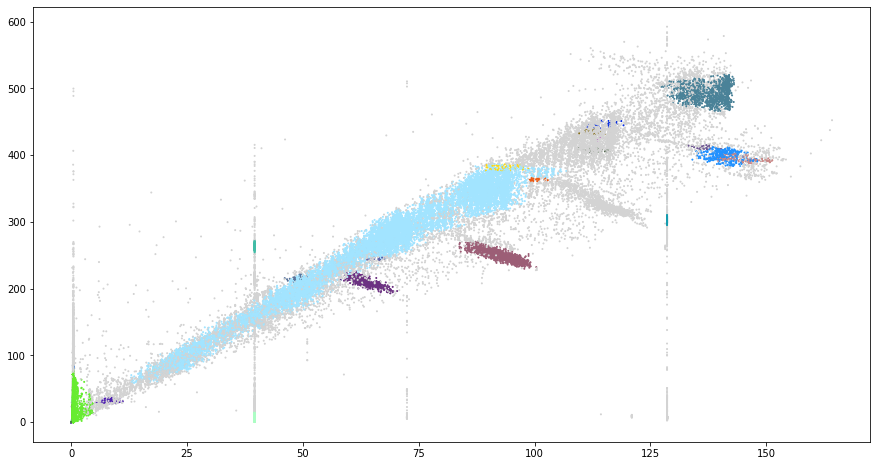

In [13]:
grafica_clusters(dataCarlos, labels_carlos, n_clusters_carlos)

## C_O_P Felipe

In [14]:
dataFelipe = data3[['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA TERMICA BOMBA CALOR FELIPE', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR FELIPE']]
dataFelipe.describe()

,POTENCIA BOMBA CALOR FELIPE,POTENCIA TERMICA BOMBA CALOR FELIPE,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR FELIPE
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,32.952675,114.991659,15.083257,27.899720
std,45.304465,145.959139,11.345877,13.937344
min,0.000000,0.000000,-1.400000,0.000000
25%,0.640000,4.233283,6.968000,14.794000
50%,0.700000,24.492828,13.353139,28.799999
75%,66.543999,227.389796,23.717333,41.980000
max,157.706665,592.815954,43.799999,47.889999


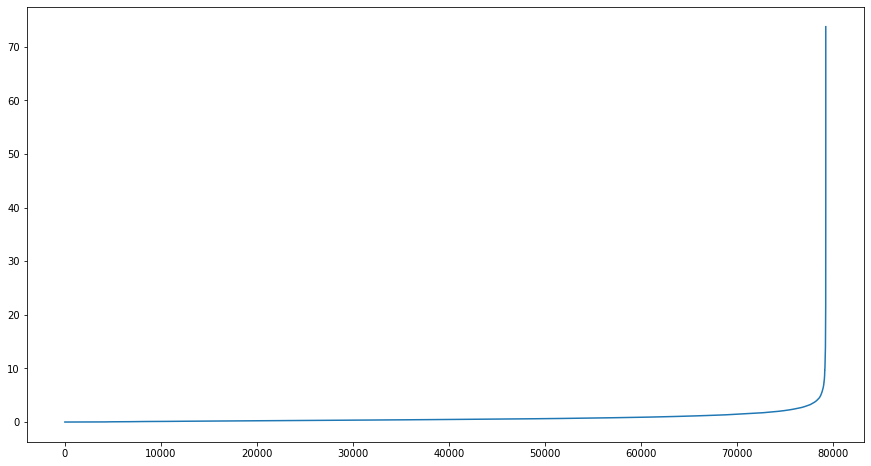

In [15]:
epsilon(dataFelipe)

In [16]:
clustering_felipe = DBSCAN(eps = 3, min_samples = 20)
clustering_felipe.fit(dataFelipe)
labels_felipe = clustering_felipe.labels_ # clusters

In [17]:
n_clusters_felipe = metricas(dataFelipe, labels_felipe)

silhouette_score:  -0.16386363509303717
Estimated number of clusters:  55
Estimated number of noise points:  10391


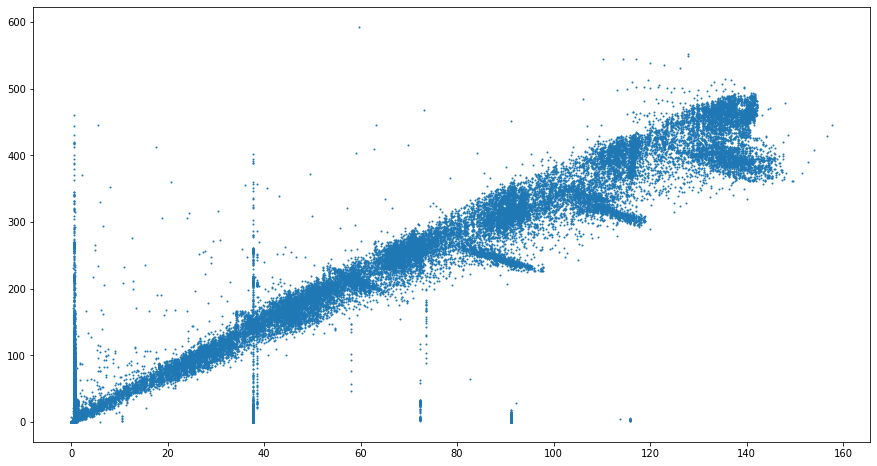

In [18]:
X_felipe = np.array(dataFelipe)
plt.figure(figsize=(15, 8))
plt.scatter(X_felipe[:,0], X_felipe[:,1], s = 1)

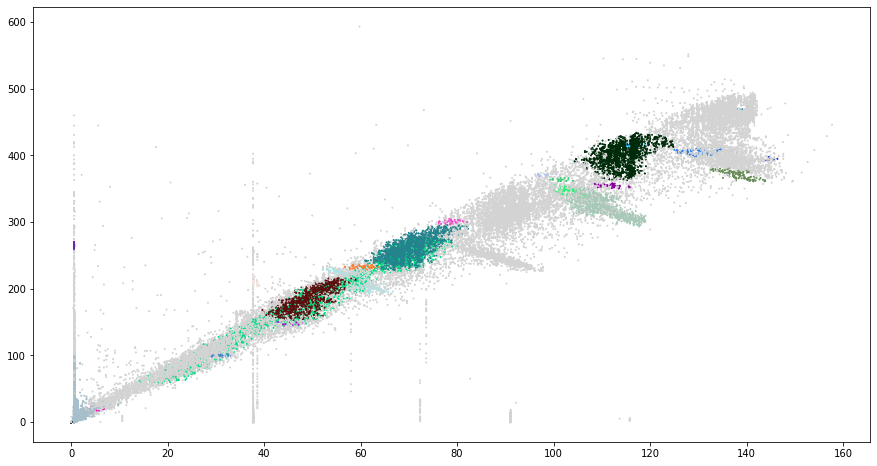

In [19]:
grafica_clusters(dataFelipe, labels_felipe, n_clusters_felipe)

## C_O_P Grupo Frío 1

In [20]:
dataFrio1 = data3[['POTENCIA GRUPO FRÍO 1', 'POTENCIA TERMICA GRUPO FRIO 1', 'TEMPERATURA EXTERIOR']]
dataFrio1.describe()

,POTENCIA GRUPO FRÍO 1,POTENCIA TERMICA GRUPO FRIO 1,TEMPERATURA EXTERIOR
count,79285.000000,79285.000000,79285.000000
mean,20.509645,95.445736,15.083257
std,26.984676,117.950837,11.345877
min,0.000000,0.000000,-1.400000
25%,0.100000,0.000000,6.968000
50%,0.100000,22.504057,13.353139
75%,38.900002,172.589200,23.717333
max,115.366669,2373.624850,43.799999


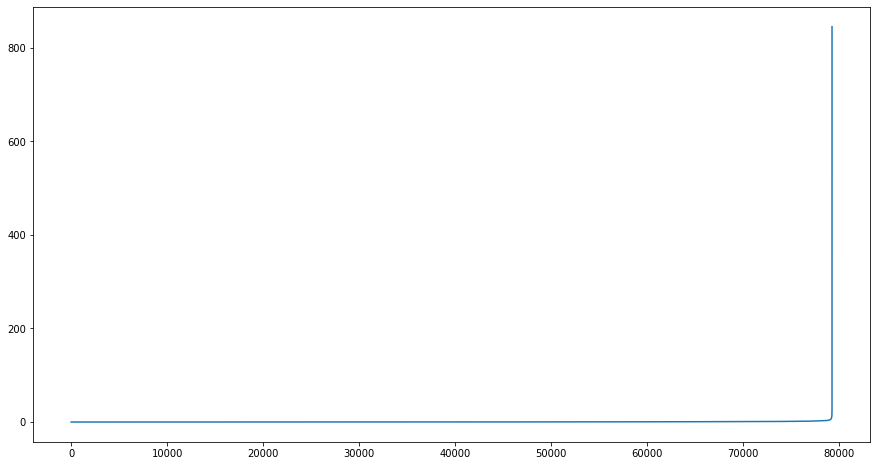

In [21]:
epsilon(dataFrio1)

In [22]:
clustering_frio1 = DBSCAN(eps = 3, min_samples = 20)
clustering_frio1.fit(dataFrio1)
labels_frio1 = clustering_frio1.labels_ # clusters

In [23]:
n_clusters_frio1 = metricas(dataFrio1, labels_frio1)

silhouette_score:  -0.19079824885927135
Estimated number of clusters:  43
Estimated number of noise points:  6250


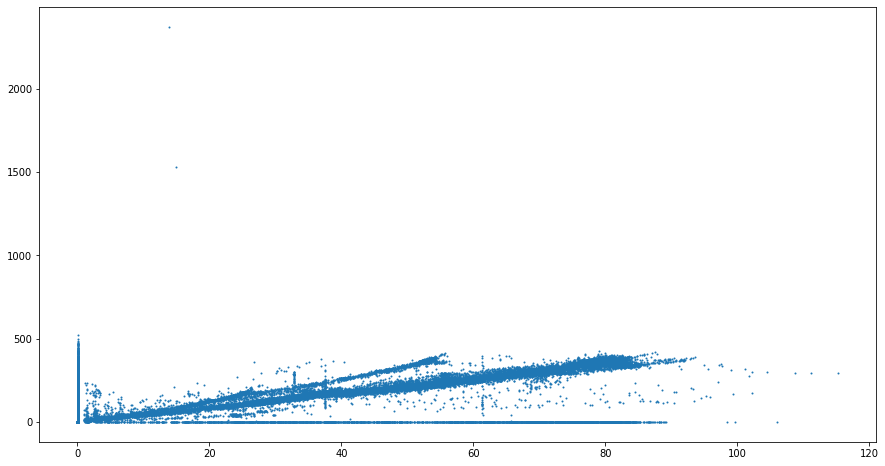

In [24]:
X_frio1 = np.array(dataFrio1)
plt.figure(figsize=(15, 8))
plt.scatter(X_frio1[:,0], X_frio1[:,1], s = 1)

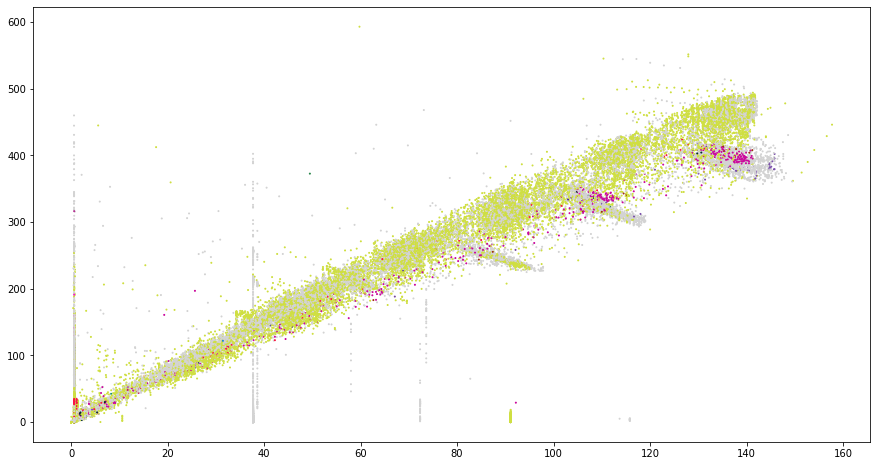

In [25]:
grafica_clusters(dataFelipe, labels_frio1, n_clusters_frio1)

## C_O_P Grupo Frío 2

In [26]:
dataFrio2 = data3[['POTENCIA GRUPO FRÍO 2', 'POTENCIA TERMICA GRUPO FRIO 2', 'TEMPERATURA EXTERIOR']]
dataFrio2.describe()

,POTENCIA GRUPO FRÍO 2,POTENCIA TERMICA GRUPO FRIO 2,TEMPERATURA EXTERIOR
count,79285.000000,79285.000000,79285.000000
mean,27.022629,97.791279,15.083257
std,28.751257,117.645826,11.345877
min,0.000000,0.000000,-1.400000
25%,0.100000,0.000000,6.968000
50%,24.876667,28.784257,13.353139
75%,52.560001,165.611200,23.717333
max,93.536667,412.806886,43.799999


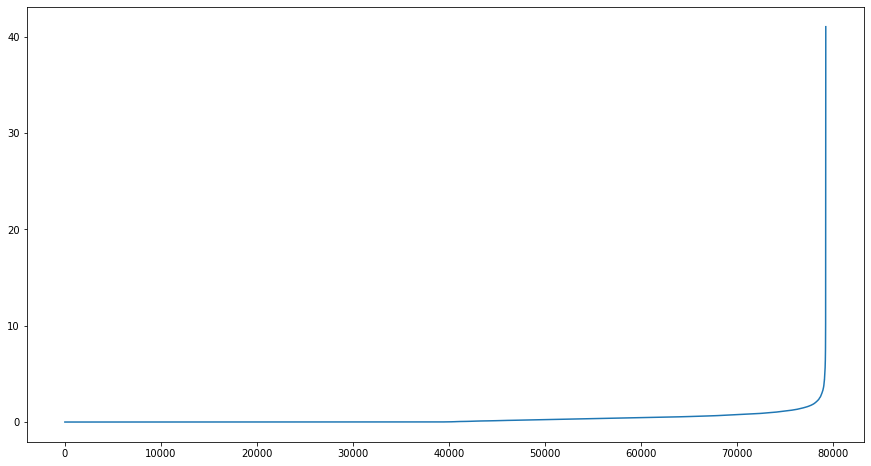

In [27]:
epsilon(dataFrio2)

In [28]:
clustering_frio2 = DBSCAN(eps = 3, min_samples = 20)
clustering_frio2.fit(dataFrio2)
labels_frio2 = clustering_frio2.labels_ # clusters

In [29]:
n_clusters_frio2 = metricas(dataFrio2, labels_frio2)

silhouette_score:  0.014032175147574679
Estimated number of clusters:  18
Estimated number of noise points:  3010


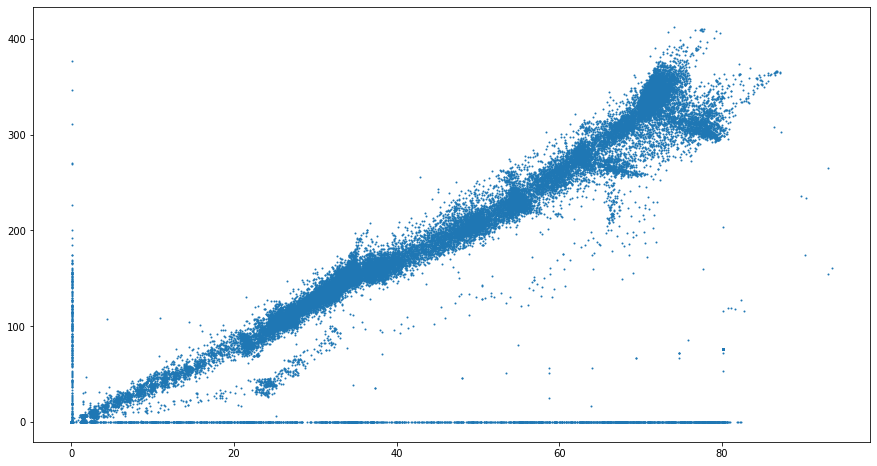

In [30]:
X_frio2 = np.array(dataFrio2)
plt.figure(figsize=(15, 8))
plt.scatter(X_frio2[:,0], X_frio2[:,1], s = 1)

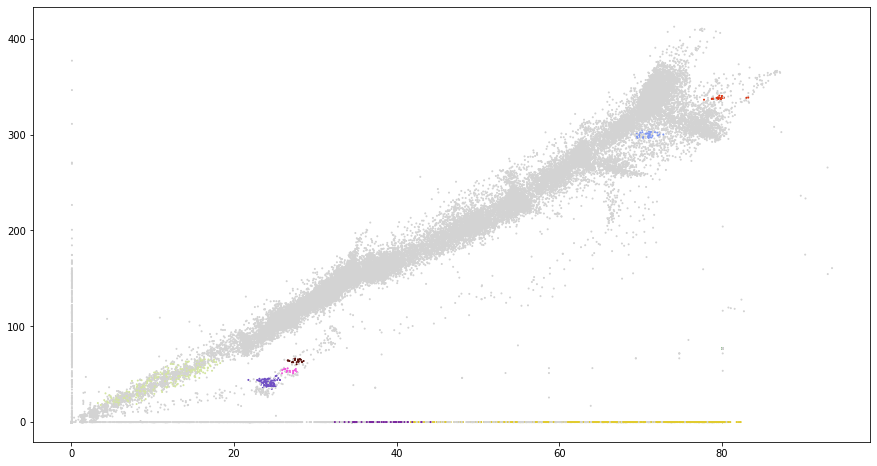

In [31]:
grafica_clusters(dataFrio2, labels_frio2, n_clusters_frio2)